<a href="https://colab.research.google.com/github/WesleyVictors/python2/blob/main/dataViz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os exercicios usando o seaborn e o plotly foram feitos aqui no colab, por que o JupyterLite tem limitações importantes quanto às bibliotecas Python, porque ele roda no navegador com Pyodide, e nem todas as bibliotecas funcionam nele.

Q2.

Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna comparecimento.



seaborn

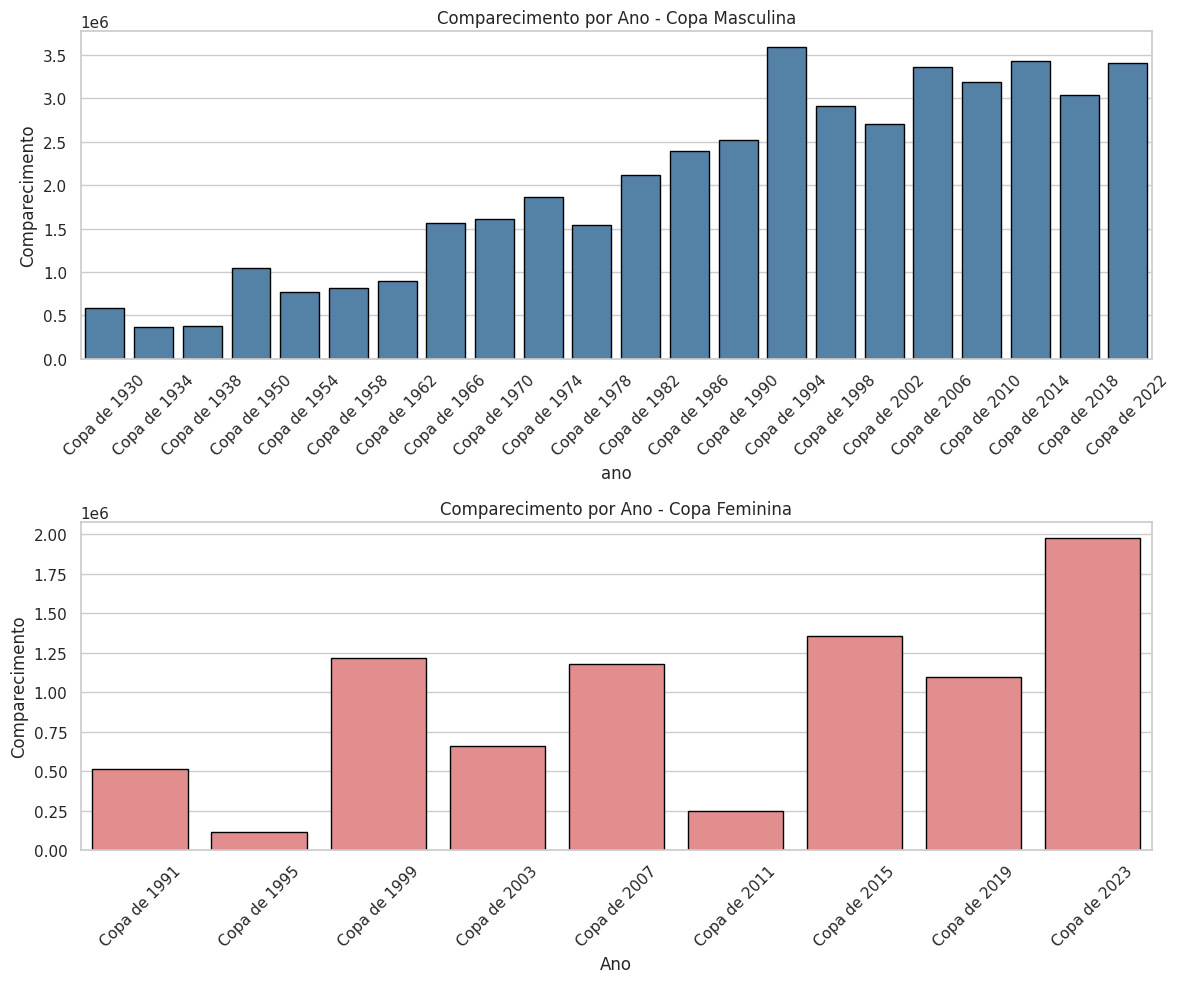

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('/wc_formatado.csv')
df = df[df['comparecimento'] > 0].dropna(subset=['comparecimento'])

masculina = df[df['copa'].str.lower() == 'masculina']
feminina = df[df['copa'].str.lower() == 'feminina']

cmp_masculina = masculina.groupby('ano')['comparecimento'].sum().reset_index()
cmp_feminina = feminina.groupby('ano')['comparecimento'].sum().reset_index()


cmp_masculina['ano'] = cmp_masculina['ano'].astype(str).apply(lambda x: f'Copa de {x}')
cmp_feminina['ano'] = cmp_feminina['ano'].astype(str).apply(lambda x: f'Copa de {x}')


sns.set(style="whitegrid")


fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)


sns.barplot(data=cmp_masculina, x='ano', y='comparecimento', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Comparecimento por Ano - Copa Masculina')
axes[0].set_ylabel('Comparecimento')
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(data=cmp_feminina, x='ano', y='comparecimento', ax=axes[1], color='lightcoral', edgecolor='black')
axes[1].set_title('Comparecimento por Ano - Copa Feminina')
axes[1].set_xlabel('Ano')
axes[1].set_ylabel('Comparecimento')
axes[1].tick_params(axis='x', rotation=45)#rotacionar os titulos dos eixos

plt.tight_layout()
plt.show()


Q2.

Sobre os dados de copa do mundo, qual a distribuição de público presente nos jogos? Isso pode ser respondido com um histograma com os dados da coluna comparecimento.


plotly

In [18]:
import pandas as pd
import plotly.graph_objects as go


df = pd.read_csv('/wc_formatado.csv')
df = df[df['comparecimento'] > 0].dropna(subset=['comparecimento'])


masculina = df[df['copa'].str.lower() == 'masculina']
feminina = df[df['copa'].str.lower() == 'feminina']


cmp_masculina = masculina.groupby('ano')['comparecimento'].sum()
cmp_feminina = feminina.groupby('ano')['comparecimento'].sum()


x_labels_masc = [f'Copa de {ano}' for ano in cmp_masculina.index]
x_labels_fem = [f'Copa de {ano}' for ano in cmp_feminina.index]

fig = go.Figure()


fig.add_trace(go.Bar(
    x=x_labels_masc,
    y=cmp_masculina.values,
    name='Masculina',
    marker_color='steelblue',
    text=[f'{v:,.0f}' for v in cmp_masculina.values],
    textposition='outside'
))

fig.add_trace(go.Bar(
    x=x_labels_fem,
    y=cmp_feminina.values,
    name='Feminina',
    marker_color='lightcoral',
    text=[f'{v:,.0f}' for v in cmp_feminina.values],
    textposition='outside'
))


fig.update_layout(
    title='Comparecimento por Ano - Copas Masculina e Feminina',
    barmode='group',
    xaxis_title='Ano',
    yaxis_title='Comparecimento',
    plot_bgcolor='white',
    xaxis=dict(tickangle=-45),  # rotaciona os rótulos do eixo x para 45 graus
    yaxis=dict(gridcolor='lightgray'),
    height=500
)

fig.show()


Q3.

Apresente um gráfico de dispersão (scatter) dos atributos gols_1 e gols_2. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir

gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))



Seaborn

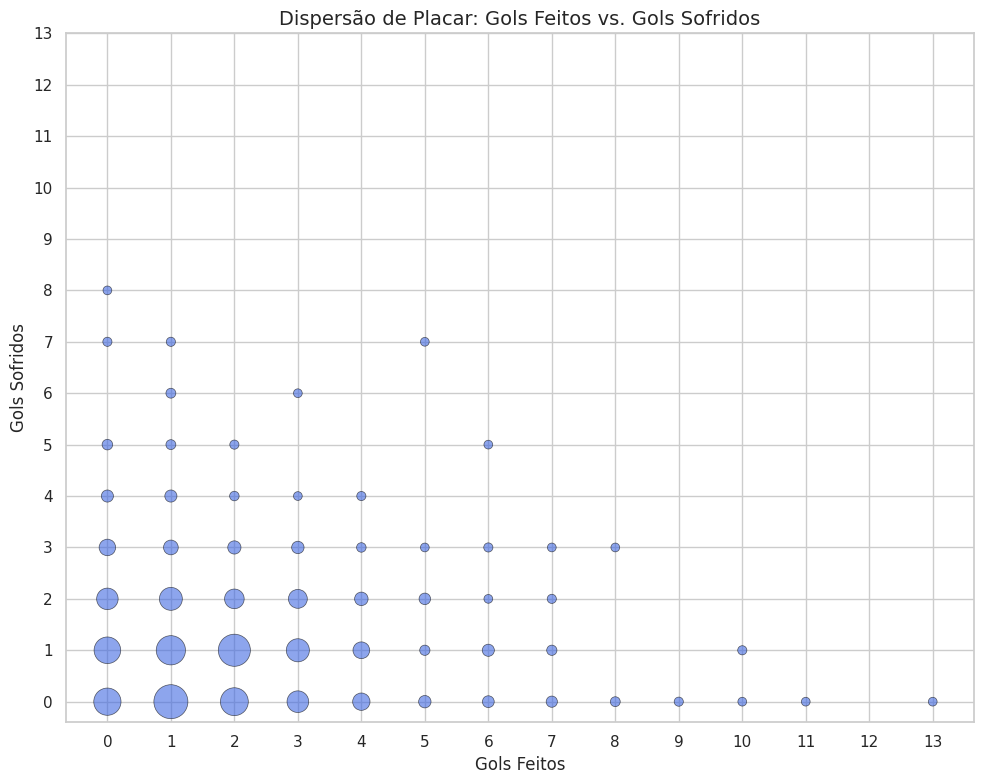

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/wc_formatado.csv')
df = df.dropna(subset=['gols_1', 'gols_2'])


agrupado = df.groupby(['gols_1', 'gols_2']).size().reset_index(name='frequencia')


max_gols = int(max(df['gols_1'].max(), df['gols_2'].max()))


sns.set(style="whitegrid", palette="muted")


plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    data=agrupado,
    x='gols_1',
    y='gols_2',
    size='frequencia',
    sizes=(40, 600),
    color='royalblue',
    legend=False,
    edgecolor='black',
    alpha=0.6
)

plt.title('Dispersão de Placar: Gols Feitos vs. Gols Sofridos', fontsize=14)
plt.xlabel('Gols Feitos')
plt.ylabel('Gols Sofridos')
plt.xticks(range(0, max_gols + 1))
plt.yticks(range(0, max_gols + 1))
plt.grid(True)
plt.tight_layout()
plt.show()


Q3.

Apresente um gráfico de dispersão (scatter) dos atributos gols_1 e gols_2. Isso representa a relação entre gols feitos e gols tomados por jogo. Há alguma relação interessante entre esses atributos?

Para facilitar a visualização dos dados (já que tem muitos placares repetidos), aplique uma leve distorção aos dados para que cada ponto esteja deslocado aleatoriamente de seu valor original. Código apresentado a seguir

gols = wc[['gols_1', 'gols_2']] * np.random.random((len(wc),2))


Plotly

In [ ]:
import pandas as pd
import plotly.express as px


df = pd.read_csv('/wc_formatado.csv')
df = df.dropna(subset=['gols_1', 'gols_2'])


agrupado = df.groupby(['gols_1', 'gols_2']).size().reset_index(name='frequencia')


fig = px.scatter(
    agrupado,
    x='gols_1',
    y='gols_2',
    size='frequencia',
    color='frequencia',
    color_continuous_scale='Viridis',
    size_max=40,
    title='Dispersão de Placar: Gols Feitos vs. Gols Sofridos',
    labels={
        'gols_1': 'Gols Feitos',
        'gols_2': 'Gols Sofridos',
        'frequencia': 'Frequência'
    }
)


fig.update_xaxes(dtick=1)
fig.update_yaxes(dtick=1)
fig.update_layout(
    plot_bgcolor='white',
    xaxis=dict(gridcolor='lightgray'),
    yaxis=dict(gridcolor='lightgray')
)

fig.show()


Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:

    https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:


Seaborn

/tmp/ipython-input-4-3616199110.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_masculino, x='time', y='copas', palette='Blues_d', ax=axes[0])
/tmp/ipython-input-4-3616199110.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_feminina, x='time', y='copas', palette='Purples_d', ax=axes[1])


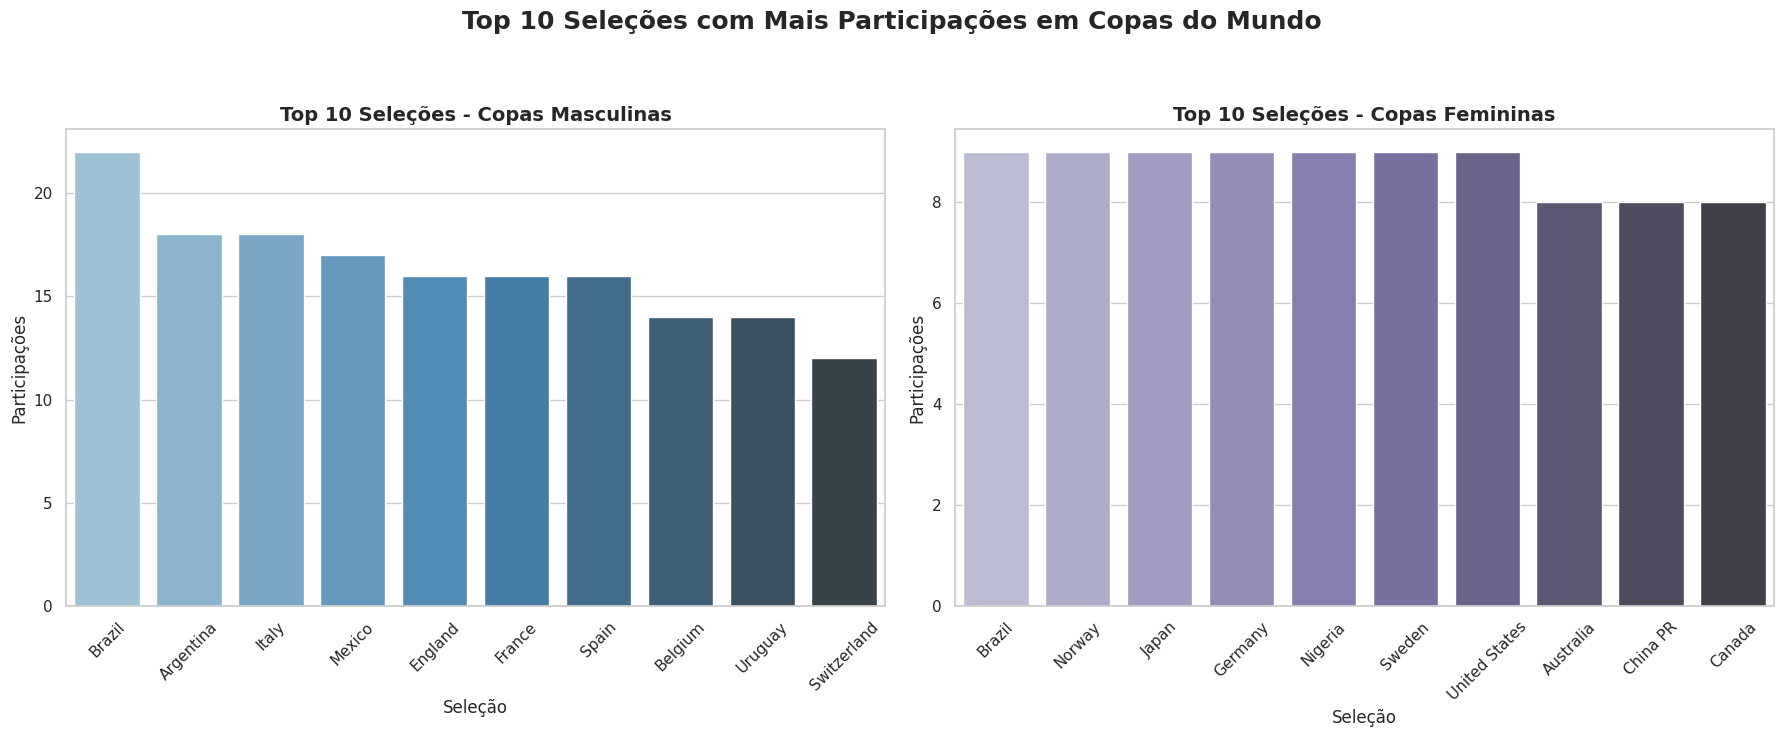

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilodo seaborn
sns.set_theme(style='whitegrid')
#carregamento usado no colab ( ja que as extensões não funciona no jupyter notebook)
df = pd.read_csv('/wc_formatado.csv')


masculina_casa = df[df['copa'].str.lower() == 'masculina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
masculina_fora = df[df['copa'].str.lower() == 'masculina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_masculina = pd.concat([masculina_casa, masculina_fora])
participacoes_masc = total_masculina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_masculino = participacoes_masc.sort_values(by='copas', ascending=False).head(10)


feminina_casa = df[df['copa'].str.lower() == 'feminina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
feminina_fora = df[df['copa'].str.lower() == 'feminina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_feminina = pd.concat([feminina_casa, feminina_fora])
participacoes_fem = total_feminina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_feminina = participacoes_fem.sort_values(by='copas', ascending=False).head(10)


fig, axes = plt.subplots(1, 2, figsize=(18, 7))


sns.barplot(data=top_masculino, x='time', y='copas', palette='Blues_d', ax=axes[0])
axes[0].set_title('Top 10 Seleções - Copas Masculinas', fontsize=14, weight='bold')
axes[0].set_xlabel('Seleção')
axes[0].set_ylabel('Participações')
axes[0].tick_params(axis='x', rotation=45)


sns.barplot(data=top_feminina, x='time', y='copas', palette='Purples_d', ax=axes[1])
axes[1].set_title('Top 10 Seleções - Copas Femininas', fontsize=14, weight='bold')
axes[1].set_xlabel('Seleção')
axes[1].set_ylabel('Participações')
axes[1].tick_params(axis='x', rotation=45)


fig.suptitle('Top 10 Seleções com Mais Participações em Copas do Mundo', fontsize=18, weight='bold', y=1.05)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()


Q4.

Apresente um gráfico de barras com o top 10 países que mais participaram de copas do mundo, onde no eixo x devem estar o nome dos países e no eixo y a contagem de participações. Você deve separar a contagem de participações em copas femininas e masculinas, empilhando as barras de cada informação.

No exemplo de barras empilhadas da galeria do matplotlib, imagine que a parte azul são as participações do país em copas masculinas, e em laranja as participações femininas:

    https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

Você deve implementar essa visualização nas três bibliotecas que vimos:

Plotly

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


#carregamento usado no colab ( ja que as extensões não funciona no jupyter notebook)
df = pd.read_csv('/wc_formatado.csv')


masculina_casa = df[df['copa'].str.lower() == 'masculina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
masculina_fora = df[df['copa'].str.lower() == 'masculina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_masculina = pd.concat([masculina_casa, masculina_fora])
participacoes_masc = total_masculina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_masculino = participacoes_masc.sort_values(by='copas', ascending=False).head(10)

feminina_casa = df[df['copa'].str.lower() == 'feminina'][['time_1', 'ano']].rename(columns={'time_1': 'time'})
feminina_fora = df[df['copa'].str.lower() == 'feminina'][['time_2', 'ano']].rename(columns={'time_2': 'time'})
total_feminina = pd.concat([feminina_casa, feminina_fora])
participacoes_fem = total_feminina.groupby('time')['ano'].nunique().reset_index(name='copas')
top_feminina = participacoes_fem.sort_values(by='copas', ascending=False).head(10)


fig = make_subplots(rows=1, cols=2, subplot_titles=(
    "Top 10 Seleções - Copas Masculinas",
    "Top 10 Seleções - Copas Femininas"
))


fig.add_trace(
    go.Bar(x=top_masculino['time'], y=top_masculino['copas'],
           name='Masculino', marker_color='royalblue'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=top_feminina['time'], y=top_feminina['copas'],
           name='Feminino', marker_color='mediumpurple'),
    row=1, col=2
)


fig.update_layout(
    title_text='Top 10 Seleções com Mais Participações em Copas do Mundo',
    title_x=0.5,
    height=600,
    width=1000,
    showlegend=False
)

fig.update_xaxes(title_text="Seleção", tickangle=45, row=1, col=1)
fig.update_yaxes(title_text="Nº de Copas", row=1, col=1)
fig.update_xaxes(title_text="Seleção", tickangle=45, row=1, col=2)
fig.update_yaxes(title_text="Nº de Copas", row=1, col=2)

fig.show()
